In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [7]:
df = pd.read_excel("/content/sample_data/ab_data.csv.xlsx")
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,00:11:48.600000,control,old_page,0
1,804228,00:01:45.200000,control,old_page,0
2,661590,00:55:06.200000,treatment,new_page,0
3,853541,00:28:03.100000,treatment,new_page,0
4,864975,00:52:26.200000,control,old_page,1


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
control = df[df['group'] == 'control']
test = df[df['group'] == 'treatment']


In [10]:
alpha = 0.05


In [11]:
control_rate = control['converted'].mean()
test_rate = test['converted'].mean()

print("Control Conversion Rate:", control_rate)
print("Test Conversion Rate:", test_rate)


Control Conversion Rate: 0.12039917935897611
Test Conversion Rate: 0.11891796466546259


In [12]:
t_stat, p_value = stats.ttest_ind(
    control['converted'],
    test['converted'],
    equal_var=False
)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.2382769307766455
P-value: 0.21561438181512005


In [13]:
if p_value < alpha:
    print("Reject H₀ → Statistically significant difference")
else:
    print("Fail to reject H₀ → No significant difference")


Fail to reject H₀ → No significant difference


In [14]:
diff = test_rate - control_rate

se = np.sqrt(
    control['converted'].var()/len(control) +
    test['converted'].var()/len(test)
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

(ci_low, ci_high)


(np.float64(-0.003825747428584367), np.float64(0.0008633180415573293))

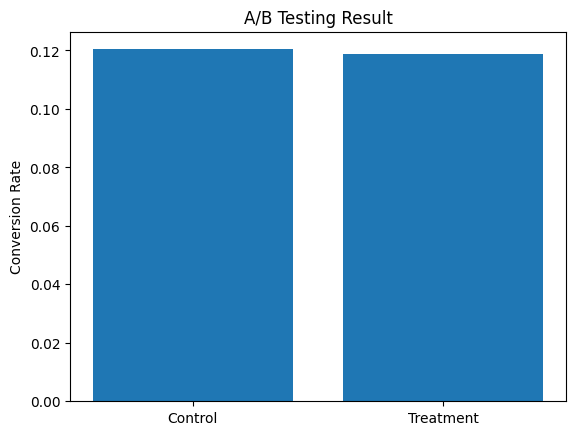

In [15]:
plt.bar(['Control', 'Treatment'], [control_rate, test_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Testing Result")
plt.show()


In [17]:
summary = pd.DataFrame({
    "Group": ["Control", "Treatment"],
    "Conversion Rate": [control_rate, test_rate]
})

summary.to_csv("ab_test_summary.csv", index=False)


In [18]:
summary = pd.DataFrame({
    "Group": ["Control", "Treatment"],
    "Conversion Rate": [control_rate, test_rate]
})

summary.to_csv("ab_test_summary.csv", index=False)


In [19]:
summary.to_csv("ab_test_summary.csv", index=False)


In [20]:
!ls


ab_test_summary.csv  drive  sample_data
